# Week 3: Build Your Own Memory Network
## From Simple Neural Networks to RNNs and LSTMs

In this enhanced lab, you'll:
1. First understand basic neural network concepts
2. Build RNNs from scratch
3. Watch them learn (and fail!) on real tasks
4. Implement LSTM and GRU architectures

In [1]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# For reproducibility
np.random.seed(42)

print("Ready to build neural networks!")

Ready to build neural networks!


## Part 0: Neural Network Playground - Building Blocks

Before diving into RNNs, let's understand the basic building blocks of neural networks.

### 0.1: A Single Neuron from Scratch

Let's build the simplest neural network: one neuron!

In [2]:
class SingleNeuron:
    """The simplest neural network: just one neuron."""
    
    def __init__(self, n_inputs):
        # Initialize weights randomly (small values)
        self.weights = np.random.randn(n_inputs) * 0.1
        self.bias = 0.1
    
    def forward(self, x):
        """Compute output step by step."""
        # Step 1: Weighted sum
        z = np.dot(self.weights, x) + self.bias
        print(f"1. Weighted sum: {z:.3f}")
        
        # Step 2: Apply activation (we'll use sigmoid)
        output = 1 / (1 + np.exp(-z))  # Sigmoid activation
        print(f"2. After activation: {output:.3f}")
        
        return output

# Create a neuron with 2 inputs
neuron = SingleNeuron(n_inputs=2)

# Test with example inputs
x = np.array([0.5, 0.3])  # Example: two features
print("Input:", x)
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)
print("\nForward pass:")
output = neuron.forward(x)
print(f"\nFinal output: {output:.3f}")
print("\nThis single neuron is detecting a pattern based on its weights!")

Input: [0.5 0.3]
Weights: [ 0.04967142 -0.01382643]
Bias: 0.1

Forward pass:
1. Weighted sum: 0.121
2. After activation: 0.530

Final output: 0.530

This single neuron is detecting a pattern based on its weights!


### 0.2: Understanding Activation Functions

Why do we need activation functions? Let's visualize and understand!

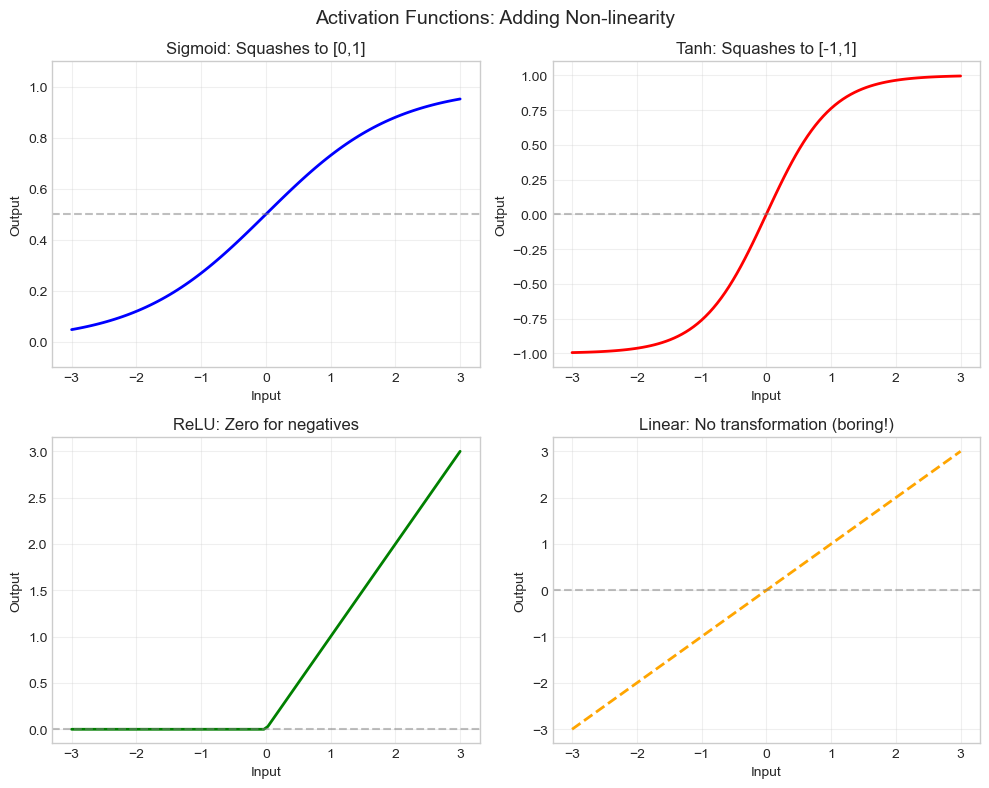

Key Insights:
• Without activation: Network can only learn linear patterns
• Sigmoid: Good for probabilities (output in [0,1])
• Tanh: Centered at zero, helps with gradients (used in RNNs!)
• ReLU: Simple and effective for deep networks


In [3]:
def visualize_activations():
    """Compare different activation functions."""
    x = np.linspace(-3, 3, 100)
    
    # Define activation functions
    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)
    relu = np.maximum(0, x)
    linear = x
    
    # Plot them
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Sigmoid
    axes[0, 0].plot(x, sigmoid, 'b-', linewidth=2)
    axes[0, 0].set_title('Sigmoid: Squashes to [0,1]')
    axes[0, 0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(-0.1, 1.1)
    
    # Tanh
    axes[0, 1].plot(x, tanh, 'r-', linewidth=2)
    axes[0, 1].set_title('Tanh: Squashes to [-1,1]')
    axes[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(-1.1, 1.1)
    
    # ReLU
    axes[1, 0].plot(x, relu, 'g-', linewidth=2)
    axes[1, 0].set_title('ReLU: Zero for negatives')
    axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Linear (no activation)
    axes[1, 1].plot(x, linear, 'orange', linewidth=2, linestyle='--')
    axes[1, 1].set_title('Linear: No transformation (boring!)')
    axes[1, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[1, 1].grid(True, alpha=0.3)
    
    for ax in axes.flat:
        ax.set_xlabel('Input')
        ax.set_ylabel('Output')
    
    plt.suptitle('Activation Functions: Adding Non-linearity', fontsize=14)
    plt.tight_layout()
    plt.show()

visualize_activations()

print("Key Insights:")
print("• Without activation: Network can only learn linear patterns")
print("• Sigmoid: Good for probabilities (output in [0,1])")
print("• Tanh: Centered at zero, helps with gradients (used in RNNs!)")
print("• ReLU: Simple and effective for deep networks")

### 0.3: Understanding Gradients and Learning

How do neural networks learn? Through gradients!

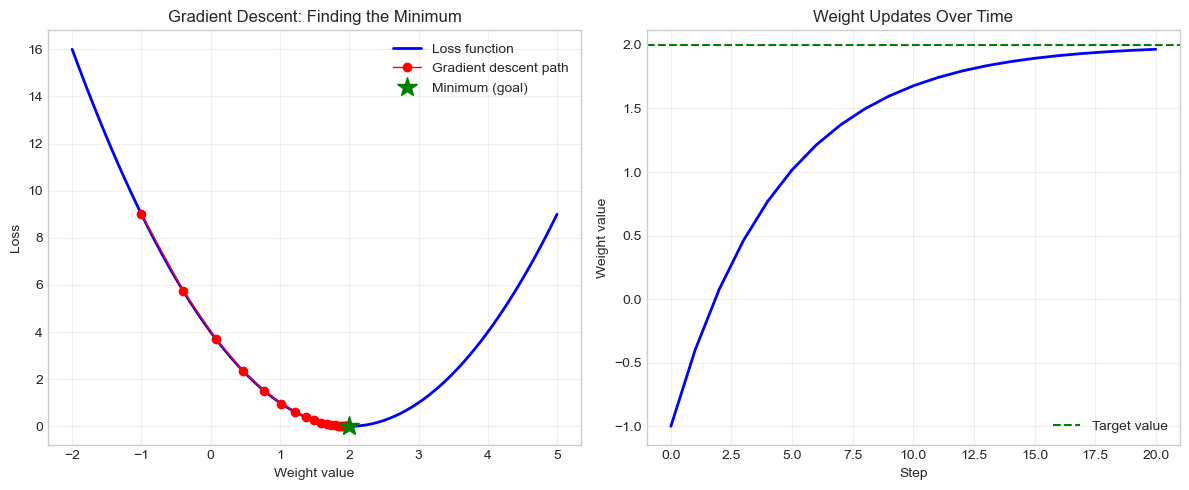

Starting weight: -1.000
Final weight: 1.965
Target weight: 2.000

The network learned the correct weight through gradient descent!


In [4]:
def gradient_descent_demo():
    """Visualize gradient descent in action."""
    
    # Simple quadratic function (our 'error landscape')
    def loss_function(w):
        return (w - 2) ** 2  # Minimum at w=2
    
    def gradient(w):
        return 2 * (w - 2)  # Derivative of loss
    
    # Start with random weight
    w = -1.0
    learning_rate = 0.1
    history = [w]
    
    # Gradient descent steps
    for step in range(20):
        grad = gradient(w)
        w = w - learning_rate * grad  # Update rule!
        history.append(w)
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot 1: Error landscape and path
    w_range = np.linspace(-2, 5, 100)
    loss_values = [loss_function(w) for w in w_range]
    
    ax1.plot(w_range, loss_values, 'b-', linewidth=2, label='Loss function')
    ax1.plot(history, [loss_function(w) for w in history], 'ro-', 
             markersize=6, linewidth=1, label='Gradient descent path')
    ax1.plot(2, 0, 'g*', markersize=15, label='Minimum (goal)')
    ax1.set_xlabel('Weight value')
    ax1.set_ylabel('Loss')
    ax1.set_title('Gradient Descent: Finding the Minimum')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Weight updates over time
    ax2.plot(history, 'b-', linewidth=2)
    ax2.axhline(y=2, color='green', linestyle='--', label='Target value')
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Weight value')
    ax2.set_title('Weight Updates Over Time')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Starting weight: {history[0]:.3f}")
    print(f"Final weight: {history[-1]:.3f}")
    print(f"Target weight: 2.000")
    print("\nThe network learned the correct weight through gradient descent!")

gradient_descent_demo()

### 0.4: Building a Simple Feedforward Network

Now let's build a small network with multiple neurons.

In [5]:
class SimpleNetwork:
    """A simple 2-layer neural network."""
    
    def __init__(self, input_size, hidden_size, output_size):
        # Layer 1: input → hidden
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        
        # Layer 2: hidden → output
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, x):
        """Forward pass through the network."""
        # Layer 1
        z1 = np.dot(x, self.W1) + self.b1
        h = np.tanh(z1)  # Hidden layer uses tanh
        
        # Layer 2
        z2 = np.dot(h, self.W2) + self.b2
        output = 1 / (1 + np.exp(-z2))  # Output uses sigmoid
        
        return output, h
    
    def count_parameters(self):
        """Count total parameters in the network."""
        return self.W1.size + self.b1.size + self.W2.size + self.b2.size

# Create a small network
net = SimpleNetwork(input_size=3, hidden_size=4, output_size=2)

# Test it
x = np.array([[0.5, 0.3, 0.8]])  # One sample with 3 features
output, hidden = net.forward(x)

print("Network Architecture:")
print(f"  Input size: 3")
print(f"  Hidden size: 4")
print(f"  Output size: 2")
print(f"  Total parameters: {net.count_parameters()}")
print(f"\nInput shape: {x.shape}")
print(f"Hidden state shape: {hidden.shape}")
print(f"Output shape: {output.shape}")
print(f"\nOutput values: {output[0]}")
print("\nThis network processes one input and produces one output. No memory!")

Network Architecture:
  Input size: 3
  Hidden size: 4
  Output size: 2
  Total parameters: 26

Input shape: (1, 3)
Hidden state shape: (1, 4)
Output shape: (1, 2)

Output values: [0.49134018 0.50094535]

This network processes one input and produces one output. No memory!


### 0.5: Why We Need Recurrence - The Limitation of Feedforward

Let's see why feedforward networks fail at sequential tasks.

In [6]:
def demonstrate_feedforward_limitation():
    """Show that feedforward networks have no memory."""
    
    # Create a simple feedforward network
    net = SimpleNetwork(input_size=5, hidden_size=3, output_size=1)
    
    # Process a sequence word by word
    words = ["The", "cat", "sat", "on", "the"]
    
    print("Processing sequence with feedforward network:")
    print("=" * 50)
    
    for i, word in enumerate(words):
        # Dummy encoding (random for demonstration)
        word_encoding = np.random.randn(1, 5) * 0.5
        
        output, hidden = net.forward(word_encoding)
        
        print(f"\nStep {i+1}: Processing '{word}'")
        print(f"  Hidden state: {hidden[0][:3]}...")  # Show first 3 values
        print(f"  Output: {output[0,0]:.3f}")
    
    print("\n" + "="*50)
    print("PROBLEM: Each word processed independently!")
    print("• No memory of previous words")
    print("• Can't understand context")
    print("• Hidden states don't carry over")
    print("\nSOLUTION: Add recurrent connections! → RNN")

demonstrate_feedforward_limitation()

Processing sequence with feedforward network:

Step 1: Processing 'The'
  Hidden state: [-0.08159518  0.02966476 -0.01291769]...
  Output: 0.503

Step 2: Processing 'cat'
  Hidden state: [-0.07726353  0.16814743 -0.05738446]...
  Output: 0.498

Step 3: Processing 'sat'
  Hidden state: [ 0.11779036 -0.0543465  -0.0172698 ]...
  Output: 0.496

Step 4: Processing 'on'
  Hidden state: [ 0.07841598 -0.07317744 -0.03912178]...
  Output: 0.498

Step 5: Processing 'the'
  Hidden state: [-0.0467565   0.01216362  0.11408808]...
  Output: 0.502

PROBLEM: Each word processed independently!
• No memory of previous words
• Can't understand context
• Hidden states don't carry over

SOLUTION: Add recurrent connections! → RNN


## Part 1: Understanding Sequential Memory

Now that we understand basic neural networks, let's move to RNNs!
Let's start with a simple task: predicting the next character in a sequence.

In [7]:
# Simple text for our experiments
text = "hello world! how are you doing today? hello again!"
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

vocab_size = len(chars)
print(f"Vocabulary size: {vocab_size}")
print(f"Characters: {chars}")

# Convert text to indices
data = [char_to_idx[ch] for ch in text]
print(f"\nFirst 20 characters as indices: {data[:20]}")

Vocabulary size: 17
Characters: [' ', '!', '?', 'a', 'd', 'e', 'g', 'h', 'i', 'l', 'n', 'o', 'r', 't', 'u', 'w', 'y']

First 20 characters as indices: [7, 5, 9, 9, 11, 0, 15, 11, 12, 9, 4, 1, 0, 7, 11, 15, 0, 3, 12, 5]


## Part 2: Building a Simple RNN from Scratch

Now we add the key innovation: **recurrent connections**!

RNN equations:
- $h_t = \tanh(W_{hh} \cdot h_{t-1} + W_{xh} \cdot x_t + b_h)$
- $y_t = W_{hy} \cdot h_t + b_y$

The key difference from our feedforward network: **h_{t-1}** (previous hidden state) is used!

In [8]:
class SimpleRNN:
    def __init__(self, vocab_size, hidden_size=10):
        """Initialize a simple RNN."""
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        
        # Initialize weights (Xavier initialization)
        self.Wxh = np.random.randn(hidden_size, vocab_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # RECURRENT WEIGHTS!
        self.Why = np.random.randn(vocab_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((vocab_size, 1))
        
    def forward_step(self, x, h_prev):
        """Forward pass for one time step."""
        # THE KEY EQUATION: combines current input + previous memory!
        h = np.tanh(self.Whh @ h_prev + self.Wxh @ x + self.bh)
        
        # Compute output
        y = self.Why @ h + self.by
        
        # Apply softmax
        p = np.exp(y) / np.sum(np.exp(y))
        
        return h, p
    
    def forward_sequence(self, inputs):
        """Process a full sequence."""
        h = np.zeros((self.hidden_size, 1))  # Start with empty memory
        outputs = []
        hidden_states = [h]
        
        for x in inputs:
            # One-hot encode input
            x_vec = np.zeros((self.vocab_size, 1))
            x_vec[x] = 1
            
            h, p = self.forward_step(x_vec, h)  # h is passed forward!
            outputs.append(p)
            hidden_states.append(h)
            
        return outputs, hidden_states

# Create and test our RNN
rnn = SimpleRNN(vocab_size, hidden_size=16)

# Process first 5 characters
outputs, hidden_states = rnn.forward_sequence(data[:5])
print("RNN successfully created!")
print(f"Hidden state shape: {hidden_states[0].shape}")
print(f"Output shape: {outputs[0].shape}")
print("\nUnlike feedforward, RNN maintains memory across time steps!")

RNN successfully created!
Hidden state shape: (16, 1)
Output shape: (17, 1)

Unlike feedforward, RNN maintains memory across time steps!


## Part 3: Visualizing Hidden States

Let's see how hidden states evolve as the RNN processes text.

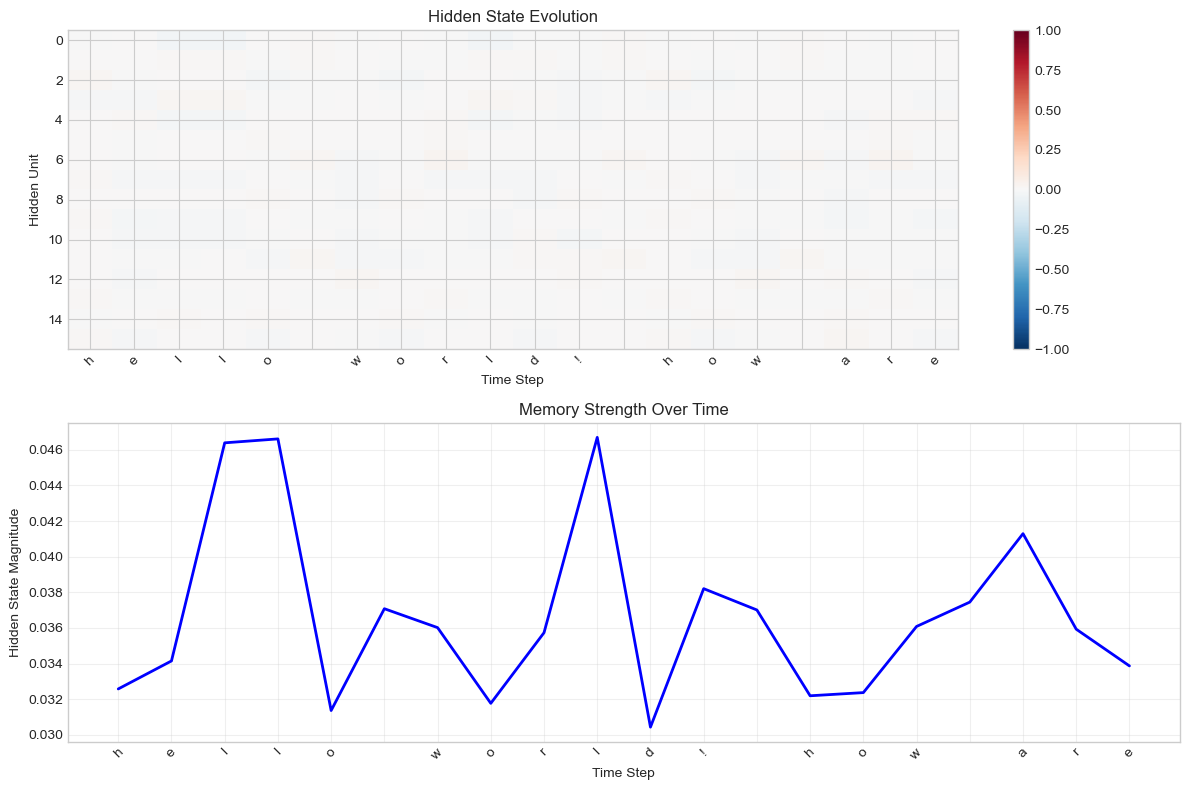

Average hidden state magnitude: 0.037


In [9]:
# Process a longer sequence
sequence_length = 20
outputs, hidden_states = rnn.forward_sequence(data[:sequence_length])

# Extract hidden states as matrix
H = np.hstack([h for h in hidden_states[1:]])  # Skip initial zero state

# Visualize hidden state evolution
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Hidden state activations over time
im1 = ax1.imshow(H, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Hidden Unit')
ax1.set_title('Hidden State Evolution')
ax1.set_xticks(range(sequence_length))
ax1.set_xticklabels([text[i] for i in range(sequence_length)], rotation=45)
plt.colorbar(im1, ax=ax1)

# Plot 2: Hidden state magnitude over time
hidden_magnitudes = np.linalg.norm(H, axis=0)
ax2.plot(hidden_magnitudes, 'b-', linewidth=2)
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Hidden State Magnitude')
ax2.set_title('Memory Strength Over Time')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(sequence_length))
ax2.set_xticklabels([text[i] for i in range(sequence_length)], rotation=45)

plt.tight_layout()
plt.show()

print(f"Average hidden state magnitude: {np.mean(hidden_magnitudes):.3f}")

## Part 4: The Vanishing Gradient Problem

Let's demonstrate why simple RNNs struggle with long sequences.

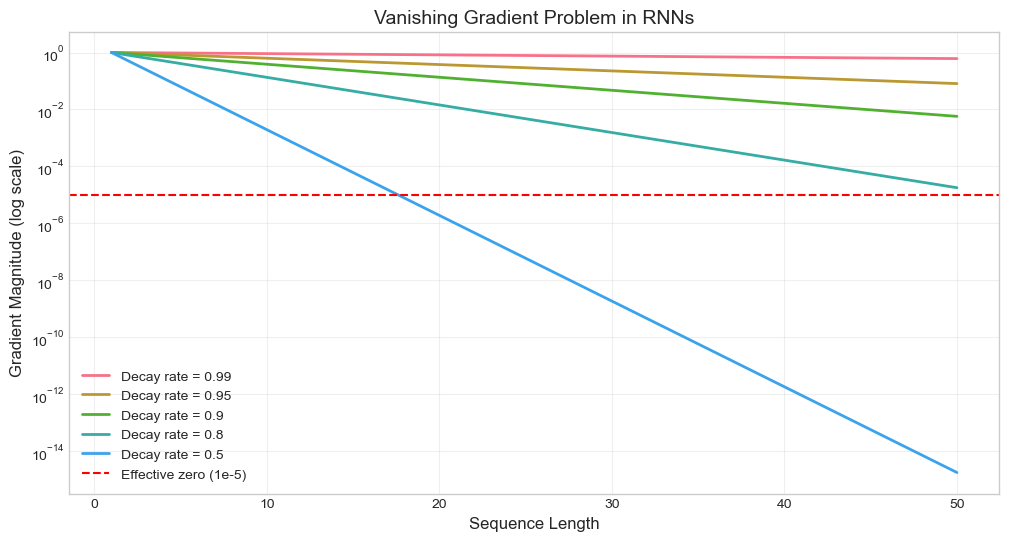

Decay rate 0.9:
  After 20 steps: 0.121577
  After 50 steps: 0.0051537752

Decay rate 0.5:
  After 20 steps: 0.000001
  After 50 steps: 0.0000000000



In [10]:
def simulate_gradient_flow(sequence_length, decay_rate=0.9):
    """Simulate gradient decay through time."""
    gradients = []
    current_gradient = 1.0
    
    for t in range(sequence_length):
        gradients.append(current_gradient)
        current_gradient *= decay_rate
    
    return gradients

# Simulate for different decay rates
sequence_lengths = np.arange(1, 51)
decay_rates = [0.99, 0.95, 0.9, 0.8, 0.5]

plt.figure(figsize=(12, 6))

for rate in decay_rates:
    gradients = [simulate_gradient_flow(length, rate)[-1] 
                 for length in sequence_lengths]
    plt.semilogy(sequence_lengths, gradients, 
                 label=f'Decay rate = {rate}', linewidth=2)

# Add threshold line
plt.axhline(y=1e-5, color='r', linestyle='--', 
            label='Effective zero (1e-5)')

plt.xlabel('Sequence Length', fontsize=12)
plt.ylabel('Gradient Magnitude (log scale)', fontsize=12)
plt.title('Vanishing Gradient Problem in RNNs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate specific examples
for rate in [0.9, 0.5]:
    gradient_20 = rate ** 20
    gradient_50 = rate ** 50
    print(f"Decay rate {rate}:")
    print(f"  After 20 steps: {gradient_20:.6f}")
    print(f"  After 50 steps: {gradient_50:.10f}")
    print()

## Part 5: Building an LSTM from Scratch

Now let's implement LSTM with its clever gating mechanism.

In [11]:
class SimpleLSTM:
    def __init__(self, vocab_size, hidden_size=10):
        """Initialize a simple LSTM."""
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        
        # Combined weight matrix for all gates
        # [input_gate; forget_gate; output_gate; candidate]
        concat_size = vocab_size + hidden_size
        
        # Initialize weights
        self.W = np.random.randn(4 * hidden_size, concat_size) * 0.01
        self.b = np.zeros((4 * hidden_size, 1))
        
        # Output weights
        self.Why = np.random.randn(vocab_size, hidden_size) * 0.01
        self.by = np.zeros((vocab_size, 1))
        
    def sigmoid(self, x):
        """Sigmoid activation."""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def forward_step(self, x, h_prev, c_prev):
        """Forward pass for one LSTM time step."""
        # Concatenate input and previous hidden state
        concat = np.vstack([x, h_prev])
        
        # Compute all gates at once
        gates = self.W @ concat + self.b
        
        # Split into individual gates
        i_gate = self.sigmoid(gates[:self.hidden_size])      # Input gate
        f_gate = self.sigmoid(gates[self.hidden_size:2*self.hidden_size])  # Forget gate
        o_gate = self.sigmoid(gates[2*self.hidden_size:3*self.hidden_size])  # Output gate
        c_candidate = np.tanh(gates[3*self.hidden_size:])    # Candidate values
        
        # Update cell state
        c = f_gate * c_prev + i_gate * c_candidate
        
        # Update hidden state
        h = o_gate * np.tanh(c)
        
        # Compute output
        y = self.Why @ h + self.by
        p = np.exp(y) / np.sum(np.exp(y))
        
        # Return everything for visualization
        gates_dict = {
            'input': i_gate,
            'forget': f_gate,
            'output': o_gate,
            'candidate': c_candidate
        }
        
        return h, c, p, gates_dict
    
    def forward_sequence(self, inputs):
        """Process a full sequence."""
        h = np.zeros((self.hidden_size, 1))
        c = np.zeros((self.hidden_size, 1))
        
        outputs = []
        hidden_states = [h]
        cell_states = [c]
        all_gates = []
        
        for x in inputs:
            # One-hot encode input
            x_vec = np.zeros((self.vocab_size, 1))
            x_vec[x] = 1
            
            h, c, p, gates = self.forward_step(x_vec, h, c)
            
            outputs.append(p)
            hidden_states.append(h)
            cell_states.append(c)
            all_gates.append(gates)
            
        return outputs, hidden_states, cell_states, all_gates

# Create and test our LSTM
lstm = SimpleLSTM(vocab_size, hidden_size=16)

# Process first 20 characters
outputs, hidden_states, cell_states, gates = lstm.forward_sequence(data[:20])
print("LSTM successfully created!")
print(f"Number of parameters in LSTM: {lstm.W.size + lstm.b.size + lstm.Why.size + lstm.by.size}")
print(f"Number of parameters in RNN: {rnn.Wxh.size + rnn.Whh.size + rnn.Why.size + rnn.bh.size + rnn.by.size}")

LSTM successfully created!
Number of parameters in LSTM: 2465
Number of parameters in RNN: 833


## Part 6: Visualizing LSTM Gates

Let's see how LSTM gates control information flow.

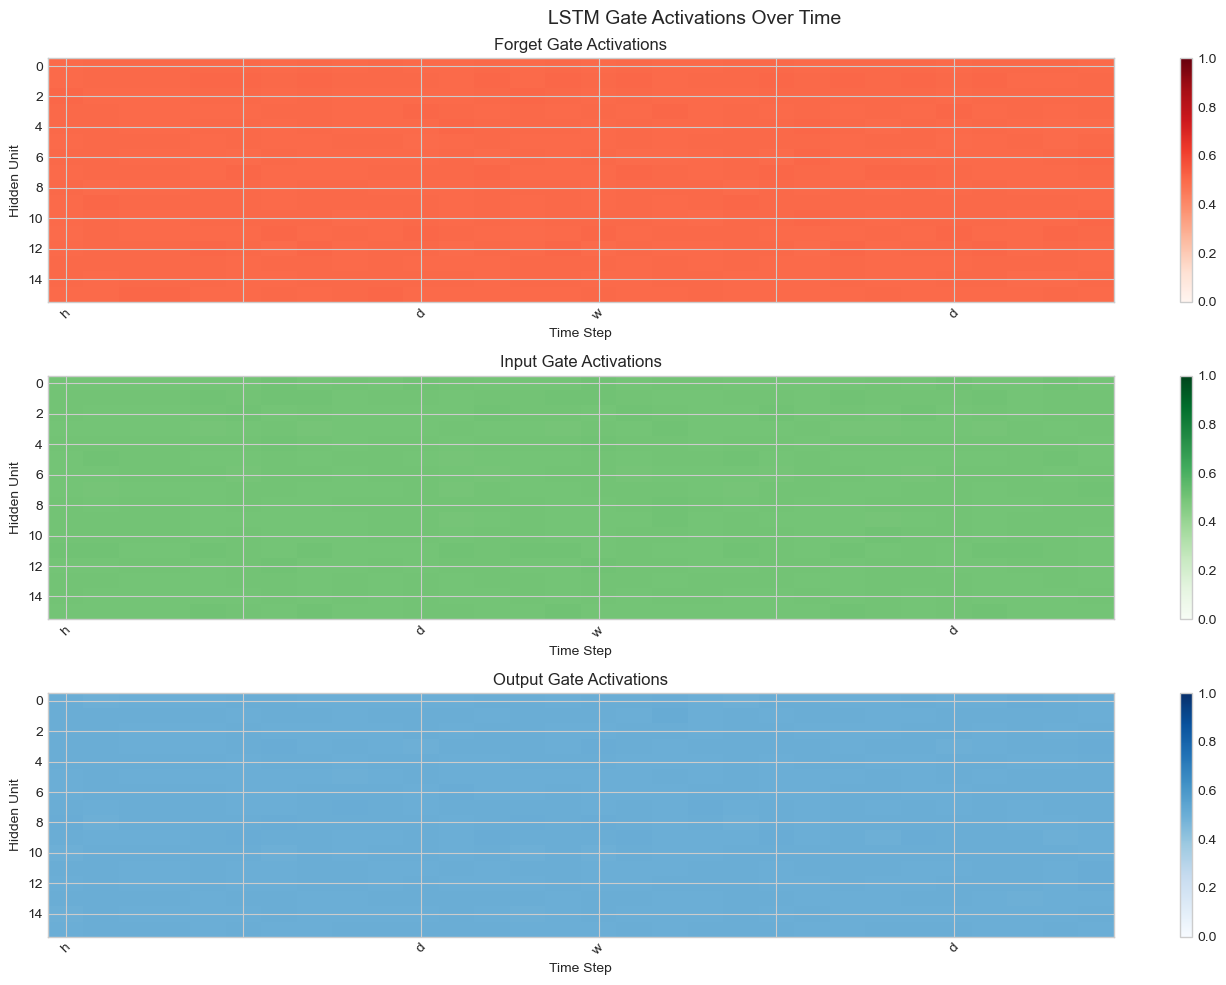

Gate Statistics:
Forget gate mean: 0.500 (closer to 1 = remembering)
Input gate mean: 0.500 (closer to 1 = storing new info)
Output gate mean: 0.500 (closer to 1 = outputting info)


In [12]:
# Extract gate activations
sequence_length = 30
outputs, hidden_states, cell_states, all_gates = lstm.forward_sequence(data[:sequence_length])

# Prepare gate data for visualization
forget_gates = np.hstack([g['forget'] for g in all_gates])
input_gates = np.hstack([g['input'] for g in all_gates])
output_gates = np.hstack([g['output'] for g in all_gates])

# Create visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

gates_data = [
    (forget_gates, 'Forget Gate', 'Reds'),
    (input_gates, 'Input Gate', 'Greens'),
    (output_gates, 'Output Gate', 'Blues')
]

for ax, (gate_data, title, cmap) in zip(axes, gates_data):
    im = ax.imshow(gate_data, aspect='auto', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(f'{title} Activations', fontsize=12)
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Hidden Unit')
    ax.set_xticks(range(0, sequence_length, 5))
    ax.set_xticklabels([text[i] for i in range(0, sequence_length, 5)], rotation=45)
    plt.colorbar(im, ax=ax)

plt.suptitle('LSTM Gate Activations Over Time', fontsize=14)
plt.tight_layout()
plt.show()

# Analyze gate statistics
print("Gate Statistics:")
print(f"Forget gate mean: {np.mean(forget_gates):.3f} (closer to 1 = remembering)")
print(f"Input gate mean: {np.mean(input_gates):.3f} (closer to 1 = storing new info)")
print(f"Output gate mean: {np.mean(output_gates):.3f} (closer to 1 = outputting info)")

## Part 7: Comparing RNN vs LSTM Memory

Let's compare how well RNNs and LSTMs maintain information over time.

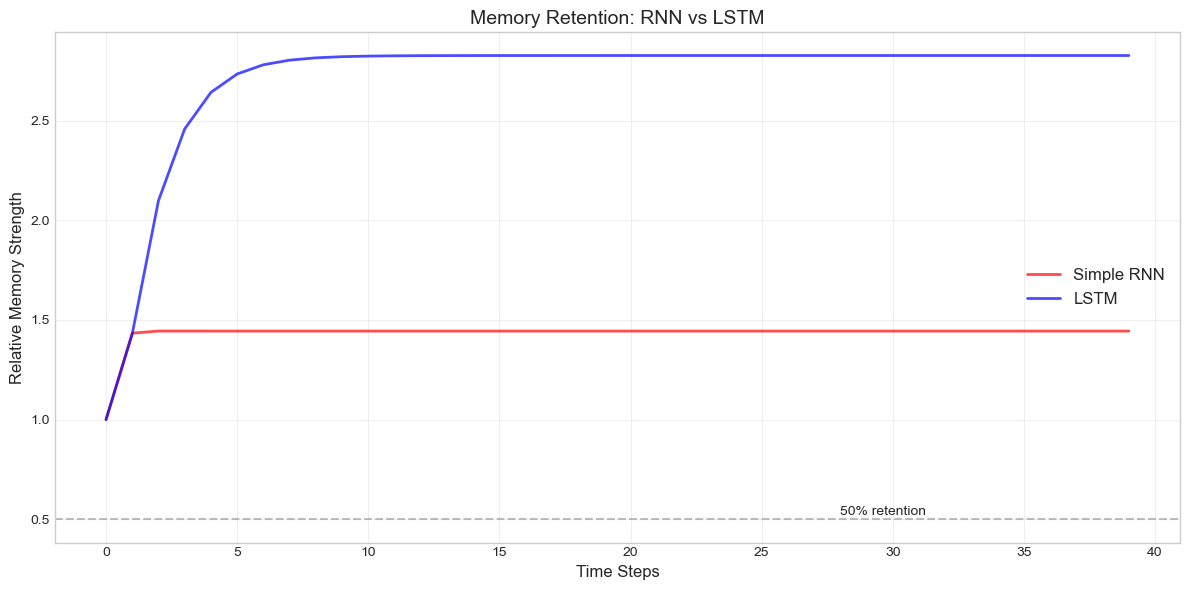

Memory Retention Analysis:
RNN memory at step 20: 1.444
LSTM memory at step 20: 2.826
RNN half-life: > 40 steps
LSTM half-life: > 40 steps


In [13]:
def memory_retention_test(model_type, sequence_length=50):
    """Test how well a model retains information."""
    # Create a simple pattern: remember first character
    test_sequence = [0] + [1] * (sequence_length - 1)  # First char is 0, rest are 1
    
    if model_type == 'RNN':
        model = SimpleRNN(vocab_size, hidden_size=16)
        outputs, hidden_states = model.forward_sequence(test_sequence)
        # Convert hidden states to matrix
        H = np.hstack([h for h in hidden_states[1:]])
        memory_strength = np.linalg.norm(H, axis=0)
        
    else:  # LSTM
        model = SimpleLSTM(vocab_size, hidden_size=16)
        outputs, hidden_states, cell_states, _ = model.forward_sequence(test_sequence)
        # Use cell states for LSTM (long-term memory)
        C = np.hstack([c for c in cell_states[1:]])
        memory_strength = np.linalg.norm(C, axis=0)
    
    return memory_strength

# Test both models
sequence_length = 40
rnn_memory = memory_retention_test('RNN', sequence_length)
lstm_memory = memory_retention_test('LSTM', sequence_length)

# Normalize for comparison
rnn_memory = rnn_memory / rnn_memory[0] if rnn_memory[0] != 0 else rnn_memory
lstm_memory = lstm_memory / lstm_memory[0] if lstm_memory[0] != 0 else lstm_memory

# Plot comparison
plt.figure(figsize=(12, 6))
x_axis = np.arange(sequence_length)

plt.plot(x_axis, rnn_memory, 'r-', linewidth=2, label='Simple RNN', alpha=0.7)
plt.plot(x_axis, lstm_memory, 'b-', linewidth=2, label='LSTM', alpha=0.7)

plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Relative Memory Strength', fontsize=12)
plt.title('Memory Retention: RNN vs LSTM', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.text(sequence_length * 0.7, 0.52, '50% retention', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate retention metrics
rnn_half_life = np.where(rnn_memory < 0.5)[0]
lstm_half_life = np.where(lstm_memory < 0.5)[0]

print("Memory Retention Analysis:")
print(f"RNN memory at step 20: {rnn_memory[19]:.3f}")
print(f"LSTM memory at step 20: {lstm_memory[19]:.3f}")
if len(rnn_half_life) > 0:
    print(f"RNN half-life: {rnn_half_life[0]} steps")
else:
    print("RNN half-life: > 40 steps")
if len(lstm_half_life) > 0:
    print(f"LSTM half-life: {lstm_half_life[0]} steps")
else:
    print("LSTM half-life: > 40 steps")

## Part 8: Text Generation Challenge

Let's train our models and see which generates better text!

In [14]:
def generate_text(model, seed_char, length=50, temperature=1.0):
    """Generate text using trained model."""
    generated = seed_char
    x = char_to_idx[seed_char]
    
    if isinstance(model, SimpleRNN):
        h = np.zeros((model.hidden_size, 1))
        
        for _ in range(length):
            x_vec = np.zeros((model.vocab_size, 1))
            x_vec[x] = 1
            
            h, p = model.forward_step(x_vec, h)
            
            # Sample with temperature
            p = np.power(p, 1/temperature)
            p = p / np.sum(p)
            x = np.random.choice(range(model.vocab_size), p=p.ravel())
            generated += idx_to_char[x]
            
    else:  # LSTM
        h = np.zeros((model.hidden_size, 1))
        c = np.zeros((model.hidden_size, 1))
        
        for _ in range(length):
            x_vec = np.zeros((model.vocab_size, 1))
            x_vec[x] = 1
            
            h, c, p, _ = model.forward_step(x_vec, h, c)
            
            # Sample with temperature
            p = np.power(p, 1/temperature)
            p = p / np.sum(p)
            x = np.random.choice(range(model.vocab_size), p=p.ravel())
            generated += idx_to_char[x]
    
    return generated

# Generate text with both models
print("=" * 60)
print("Text Generation Comparison")
print("=" * 60)

seed_char = 'h'
print(f"\nSeed character: '{seed_char}'\n")

# RNN generation
print("Simple RNN generated text:")
rnn_text = generate_text(rnn, seed_char, length=50, temperature=0.8)
print(f"  {rnn_text}")

print("\nLSTM generated text:")
lstm_text = generate_text(lstm, seed_char, length=50, temperature=0.8)
print(f"  {lstm_text}")

print("\n" + "=" * 60)
print("Note: These are untrained models with random weights.")
print("With training, LSTM would show much better coherence!")

Text Generation Comparison

Seed character: 'h'

Simple RNN generated text:
  h ohattienddr ! ?!yd?dwigugeageodl!agwgod? e??r lgi

LSTM generated text:
  hleerua!welg?niahtn!lotn?ro geoanwtwy nhudynt!ar t 

Note: These are untrained models with random weights.
With training, LSTM would show much better coherence!


## Part 9: Building a GRU (Simplified LSTM)

Let's implement a GRU, which achieves similar performance to LSTM with fewer parameters.

In [15]:
class SimpleGRU:
    def __init__(self, vocab_size, hidden_size=10):
        """Initialize a simple GRU."""
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        
        # GRU has 3 weight matrices: reset, update, candidate
        concat_size = vocab_size + hidden_size
        
        self.Wr = np.random.randn(hidden_size, concat_size) * 0.01  # Reset gate
        self.Wz = np.random.randn(hidden_size, concat_size) * 0.01  # Update gate
        self.Wh = np.random.randn(hidden_size, concat_size) * 0.01  # Candidate
        
        self.br = np.zeros((hidden_size, 1))
        self.bz = np.zeros((hidden_size, 1))
        self.bh = np.zeros((hidden_size, 1))
        
        # Output weights
        self.Why = np.random.randn(vocab_size, hidden_size) * 0.01
        self.by = np.zeros((vocab_size, 1))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def forward_step(self, x, h_prev):
        """Forward pass for one GRU time step."""
        # Concatenate input and previous hidden state
        concat = np.vstack([x, h_prev])
        
        # Reset gate
        r = self.sigmoid(self.Wr @ concat + self.br)
        
        # Update gate
        z = self.sigmoid(self.Wz @ concat + self.bz)
        
        # Candidate hidden state (with reset gate applied)
        concat_reset = np.vstack([x, r * h_prev])
        h_candidate = np.tanh(self.Wh @ concat_reset + self.bh)
        
        # Final hidden state (interpolation)
        h = (1 - z) * h_prev + z * h_candidate
        
        # Output
        y = self.Why @ h + self.by
        p = np.exp(y) / np.sum(np.exp(y))
        
        return h, p, {'reset': r, 'update': z}

# Create GRU and compare parameter counts
gru = SimpleGRU(vocab_size, hidden_size=16)

# Count parameters
lstm_params = lstm.W.size + lstm.b.size + lstm.Why.size + lstm.by.size
gru_params = (gru.Wr.size + gru.Wz.size + gru.Wh.size + 
              gru.br.size + gru.bz.size + gru.bh.size +
              gru.Why.size + gru.by.size)
rnn_params = (rnn.Wxh.size + rnn.Whh.size + rnn.Why.size + 
              rnn.bh.size + rnn.by.size)

print("Model Comparison:")
print(f"Simple RNN parameters: {rnn_params}")
print(f"LSTM parameters: {lstm_params}")
print(f"GRU parameters: {gru_params}")
print(f"\nGRU has {lstm_params - gru_params} fewer parameters than LSTM")
print(f"GRU has {gru_params - rnn_params} more parameters than simple RNN")

Model Comparison:
Simple RNN parameters: 833
LSTM parameters: 2465
GRU parameters: 1921

GRU has 544 fewer parameters than LSTM
GRU has 1088 more parameters than simple RNN


## Part 10: Summary and Key Takeaways

Let's visualize what we've learned about neural networks and RNNs!

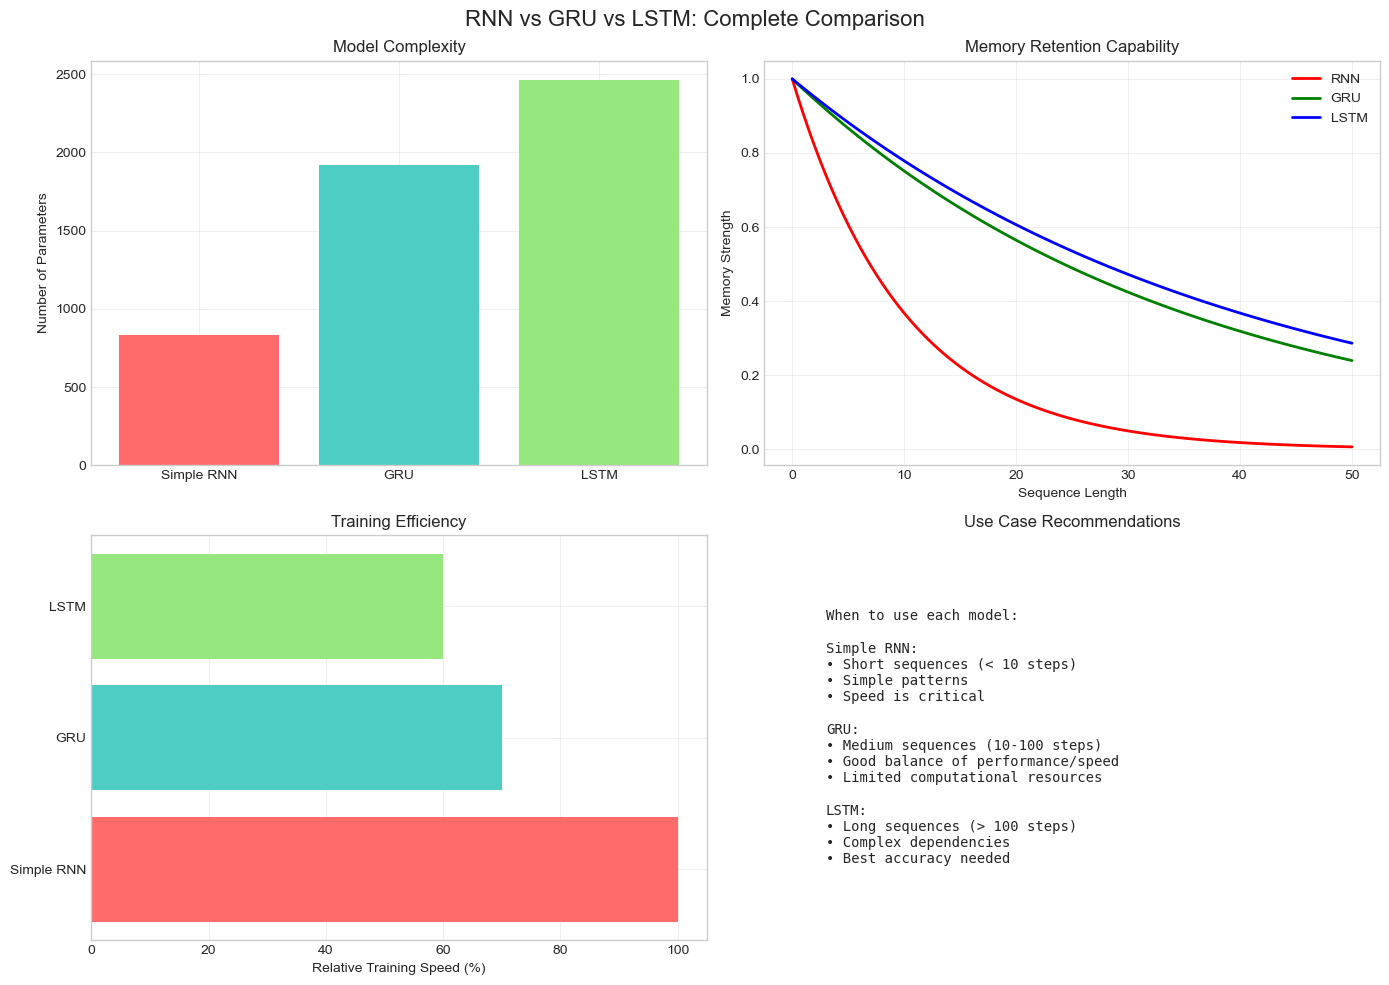


Lab Complete!

You've successfully:
1. Understood basic neural network concepts
2. Built RNN, LSTM, and GRU from scratch
3. Visualized hidden states and gate activations
4. Demonstrated the vanishing gradient problem
5. Compared memory retention capabilities
6. Generated text with different architectures

Next steps: Train these models on real data!


In [16]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Model Complexity
models = ['Simple RNN', 'GRU', 'LSTM']
params = [rnn_params, gru_params, lstm_params]
colors = ['#FF6B6B', '#4ECDC4', '#95E77E']

axes[0, 0].bar(models, params, color=colors)
axes[0, 0].set_ylabel('Number of Parameters')
axes[0, 0].set_title('Model Complexity')
axes[0, 0].grid(True, alpha=0.3)

# 2. Memory Retention (simulated)
x = np.linspace(0, 50, 100)
rnn_retention = np.exp(-x/10)
lstm_retention = np.exp(-x/40)
gru_retention = np.exp(-x/35)

axes[0, 1].plot(x, rnn_retention, 'r-', label='RNN', linewidth=2)
axes[0, 1].plot(x, gru_retention, 'g-', label='GRU', linewidth=2)
axes[0, 1].plot(x, lstm_retention, 'b-', label='LSTM', linewidth=2)
axes[0, 1].set_xlabel('Sequence Length')
axes[0, 1].set_ylabel('Memory Strength')
axes[0, 1].set_title('Memory Retention Capability')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Training Speed (relative)
models = ['Simple RNN', 'GRU', 'LSTM']
speed = [100, 70, 60]  # Relative speed
axes[1, 0].barh(models, speed, color=colors)
axes[1, 0].set_xlabel('Relative Training Speed (%)')
axes[1, 0].set_title('Training Efficiency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Use Case Recommendations
use_cases_text = """
When to use each model:

Simple RNN:
• Short sequences (< 10 steps)
• Simple patterns
• Speed is critical

GRU:
• Medium sequences (10-100 steps)
• Good balance of performance/speed
• Limited computational resources

LSTM:
• Long sequences (> 100 steps)
• Complex dependencies
• Best accuracy needed
"""

axes[1, 1].text(0.1, 0.5, use_cases_text, fontsize=10, 
                verticalalignment='center', family='monospace')
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].axis('off')
axes[1, 1].set_title('Use Case Recommendations')

plt.suptitle('RNN vs GRU vs LSTM: Complete Comparison', fontsize=16)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Lab Complete!")
print("="*60)
print("\nYou've successfully:")
print("1. Understood basic neural network concepts")
print("2. Built RNN, LSTM, and GRU from scratch")
print("3. Visualized hidden states and gate activations")
print("4. Demonstrated the vanishing gradient problem")
print("5. Compared memory retention capabilities")
print("6. Generated text with different architectures")
print("\nNext steps: Train these models on real data!")